Query for gilded comments:

    SELECT * FROM [fh-bigquery:reddit_comments.2015_05] WHERE gilded >= 1

In [22]:
%matplotlib inline
%load_ext signature

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import helpers

# Set style and meta info.
mpl.style.use('ramiro')

chartinfo = 'Author: Ramiro Gómez - ramiro.org • Data: Reddit /u/Stuck_In_the_Matrix & /u/fhoffa - reddit.com'
infosize = 12

df_subreddit_ranks = pd.read_csv('csv/reddit_comments_201505_subreddit_ranks.csv', index_col='subreddit')
df_gilded = pd.read_csv('csv/reddit_comments_201505_gilded_comments.csv')
df_gilded.head()

The signature extension is already loaded. To reload it, use:
  %reload_ext signature


,body,score_hidden,archived,name,author,author_flair_text,downs,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class
0,Even more reason to go suck it\n,False,False,t1_crraphe,BoogieKing,Seattle Sounders,0,1433115464,t5_2rbnb,t3_37zxin,t1_crrakgo,5,1433505594,0,1,crraphe,MLS,5,NaN,seattle-sounders
1,"I'm Sikh, I spent some time yesterday talking ...",False,False,t1_crraqoo,Qweef,NaN,0,1433115527,t5_2qh33,t3_3803l7,t1_crraezp,318,1433505607,0,1,crraqoo,funny,318,NaN,NaN
2,I had a blast with it https://www.youtube.com/...,False,False,t1_crras65,Skylent,NaN,0,1433115604,t5_2s2ul,t3_37rgak,t3_37rgak,2,1433505625,0,1,crras65,AndroidGaming,2,NaN,NaN
3,&gt; using this as segue into talking to our k...,False,False,t1_crrau1p,StandardToaster895,St. Louis Cardinals,0,1433115706,t5_2qm7u,t3_37zzky,t1_crr6t5q,-13,1433505650,1,1,crrau1p,baseball,-13,NaN,stl
4,&gt;Who are our world leaders?\nI think it sho...,False,False,t1_crrauyi,Nomenimion,NaN,0,1433115752,t5_2t7no,t3_380ke7,t3_380ke7,5,1433505662,0,1,crrauyi,Futurology,5,NaN,NaN


In [23]:
df_gilded.columns

Index(['body', 'score_hidden', 'archived', 'name', 'author',
       'author_flair_text', 'downs', 'created_utc', 'subreddit_id', 'link_id',
       'parent_id', 'score', 'retrieved_on', 'controversiality', 'gilded',
       'id', 'subreddit', 'ups', 'distinguished', 'author_flair_css_class'],
      dtype='object')

In [26]:
df_gilded_subreddits = df_gilded.groupby('subreddit').agg('count')
df_gilded_ranks = df_gilded_subreddits.join(df_subreddit_ranks)

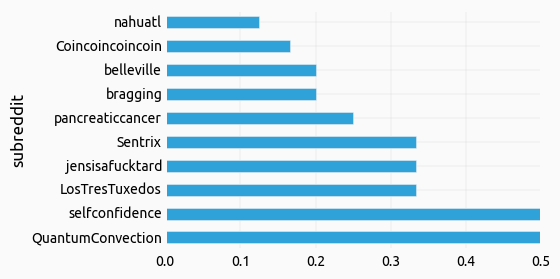

In [56]:
df_gilded_ranks['gilded_ratio'] = df_gilded_ranks.gilded / df_gilded_ranks.comments
df_gilded_ranks.sort('gilded_ratio', ascending=False).head(10)['gilded_ratio'].plot(kind='barh', figsize=(6, 4))

In [2]:
df_gilded.link_id.value_counts()

t3_370ppy    247
t3_34vwwv    244
t3_36krjr    169
t3_352aeb     76
t3_35zpvz     76
t3_35qodf     66
t3_36u262     64
t3_37h3jd     64
t3_35w1yi     46
t3_35dwh0     46
t3_35c1go     45
t3_36mxde     38
t3_36959m     35
t3_360qs1     32
t3_34hywb     30
t3_3523cw     30
t3_376qki     30
t3_35ba12     29
t3_359pp3     27
t3_35pzua     27
t3_34ml0q     27
t3_371605     26
t3_37ca78     24
t3_35ym8t     24
t3_363d2m     23
t3_36j690     22
t3_35i6xu     22
t3_36047f     21
t3_350629     21
t3_365rlk     21
            ... 
t3_35tntg      1
t3_356v43      1
t3_363d1m      1
t3_36r2tj      1
t3_364hnq      1
t3_375ey3      1
t3_353xnm      1
t3_356kdj      1
t3_355mim      1
t3_364nlq      1
t3_37f494      1
t3_37uu0h      1
t3_35ufxi      1
t3_362ceq      1
t3_36q4v7      1
t3_3797jg      1
t3_36l04m      1
t3_34kqzp      1
t3_34ixuw      1
t3_372nyv      1
t3_37u3pv      1
t3_34gdc7      1
t3_37u5db      1
t3_34yifb      1
t3_35wax3      1
t3_35xx8r      1
t3_36zfy8      1
t3_36lnap     

In [6]:
df_gilded.describe()

,score_hidden,archived,downs,created_utc,score,retrieved_on,controversiality,gilded,ups
count,17472,17472,17472,1.747200e+04,17472.000000,1.747200e+04,17472.000000,17472.000000,17472.000000
mean,0.001717033,0,0,1.431760e+09,536.176397,1.433055e+09,0.030792,1.061756,536.176397
std,0.04140269,0,0,7.568899e+05,1062.607414,2.183527e+05,0.172759,0.434896,1062.607414
min,False,False,0,1.430439e+09,-618.000000,1.432703e+09,0.000000,1.000000,-618.000000
25%,0,0,0,1.431098e+09,5.000000,1.432845e+09,0.000000,1.000000,5.000000
50%,0,0,0,1.431721e+09,42.000000,1.433085e+09,0.000000,1.000000,42.000000
75%,0,0,0,1.432413e+09,436.000000,1.433229e+09,0.000000,1.000000,436.000000
max,True,False,0,1.433117e+09,6761.000000,1.435759e+09,1.000000,27.000000,6761.000000


In [8]:
df_gilded.sort('gilded', ascending=False).head(10)

,body,score_hidden,archived,name,author,author_flair_text,downs,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class
4795,You seem sincere and this doesn't appear to be...,False,False,t1_cqvrdz6,Kakkerlak,NaN,0,1430539515,t5_2rawz,t3_34l7vo,t3_34l7vo,4275,1432725652,0,27,cqvrdz6,legaladvice,4275,NaN,NaN
913,My education.\n\nHAAAAAAAAAAAAAAAAAAAHAHAHAHha...,False,False,t1_cr9xc7c,CToxin,NaN,0,1431692877,t5_2qh1i,t3_361tpi,t3_361tpi,4669,1433077273,0,12,cr9xc7c,AskReddit,4669,NaN,NaN
11401,"'I came here to say this, just sayin', the fee...",False,False,t1_cr0ea66,Poem_for_your_sprog,NaN,0,1430932053,t5_2qh1i,t3_3523cw,t1_cr09bkq,5361,1432806818,0,11,cr0ea66,AskReddit,5361,NaN,NaN
14557,"I don't want your button press, but I'll buy y...",False,False,t1_crdlbgb,Elise24,non presser,0,1431998808,t5_36buk,t3_36f70a,t3_36f70a,3473,1433140621,0,11,crdlbgb,thebutton,3473,NaN,no-press
6330,It is true that any person will lose weight if...,False,False,t1_crlk9hq,eavc,7Δ,0,1432663899,t5_2w2s8,t3_37c5ei,t3_37c5ei,3389,1433278409,0,11,crlk9hq,changemyview,3389,NaN,NaN
5890,HEY! THAT'S ME!!! https://twitter.com/RyanMirv...,False,False,t1_cqyksjq,RyanMirvis,NaN,0,1430786340,t5_2qh33,t3_34vejv,t3_34vejv,5642,1432774689,0,10,cqyksjq,funny,5642,NaN,NaN
10766,oh okay cool,False,False,t1_cr89ohe,chewy_undername,NaN,0,1431556516,t5_2qh0u,t3_35vdng,t1_cr89muo,4468,1433048666,0,10,cr89ohe,pics,4468,NaN,NaN
5308,flat out asking for gold\n\n**Edit:** you made...,False,False,t1_crfjkeh,ClaudioRules,NaN,0,1432150405,t5_2qh1i,t3_36np7w,t3_36np7w,2227,1433174238,0,9,crfjkeh,AskReddit,2227,NaN,NaN
13137,"enter ""chrome://flags/#enable-tab-audio-muting...",False,False,t1_cqv4a20,longandshortofit,NaN,0,1430496537,t5_2szyo,t3_34j0r7,t3_34j0r7,5116,1432714610,0,9,cqv4a20,Showerthoughts,5116,NaN,NaN
6552,Please think twice before gilding anyone on th...,False,False,t1_cr6v6in,rajeevist,NaN,0,1431456660,t5_2qh49,t3_35qodf,t3_35qodf,980,1433024438,0,8,cr6v6in,blog,980,NaN,NaN
